In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample
from scipy.io import savemat
from src.xray import *
from src.tdt_support import *
from src.filters import *
from src.neural_analysis import *

In [3]:
tdt_data, bp_list, kin_data = crop_data('/home/diya/Documents/rat-fes/data/rat-q/anipose-21122/session/pose-3d-filtered/_q0-021122-1_2022-02-11_200f-11e100g1.csv', 
                     '/home/diya/Documents/rat-fes/data/rat-q/2-11-22/TDT/q0-021122-1-220211-160101', 
                     '/home/diya/Documents/rat-fes/data/rat-q/2-11-22/Vids/TIMESTAMPS_cam1_q0-021122-1_2022-02-11_200f-11e100g1.npy', 
                     70, 90)

read from t=0s to t=173.61s


In [51]:
tdt_data['neural'] = filter_neural(tdt_data['neural'], tdt_data['fs'])
ts = tdt_data['ts']
fs = tdt_data['fs']
neural = remove_artifacts(tdt_data['neural'], fs, ts)

In [52]:
spikes = autothreshold_crossings(neural, 3.5)

In [53]:
binned_spikes = spike_binner(spikes, fs, 0.05)

In [54]:
binned_spikes.shape

(32, 401)

In [28]:
spikes.shape

(32, 488282)

/home/diya/anaconda3/envs/rat-fes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
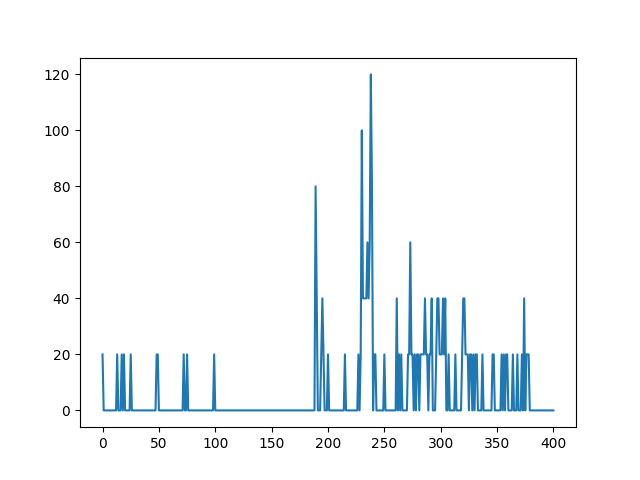

In [56]:
fig0 = plt.figure()
ax0=fig0.add_subplot(111)
ax0.plot(binned_spikes[1])

In [143]:
tdt_data['neural'].shape

(32, 488282)

In [144]:
chan = tdt_data['neural'][0]

In [146]:
std = np.std(chan)

In [147]:
std

17.034875541177996

In [158]:
crossings = np.diff(chan > 3*std, prepend=0)

In [161]:
np.put(crossings, np.where(crossings==-1), 0)

In [162]:
crossings[0:100]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [140]:
tdt_data['neural'] = remove_artifacts(tdt_data)

In [141]:
tdt_data['neural'].shape

(32, 488282)

In [111]:
sum_neural = np.sum(np.abs(neural), 0)
binsize = math.floor(0.001 * fs)
binned_sum_neural = []

for i in range(0,sum_neural.shape[0],binsize):
    binned_sum_neural.append(np.average(sum_neural[i:i+binsize]))
    
std = np.std(np.array(binned_sum_neural))
bad_bins = []
for index, bin_value in enumerate(binned_sum_neural):
    if bin_value > (5*std):
        bad_bins.append(index*binsize)
        
new_neural = []

for channel in neural:
    std = np.std(channel)
    for artifacts in bad_bins:
        channel[artifacts:artifacts + binsize] = std
        
    new_neural.append(channel)
    
updated_neural = np.array(new_neural)

In [27]:
output, up_ind = threshold_crossings(neural, -50)

In [44]:
neural_agg = np.sum(output, 0)
binsize = round(0.001 * fs)
listicle=[]
j=0
for i in range(24,neural_agg.shape[0],binsize):
    listicle.append(np.average(neural_agg[j:i]))
    j=i
    
std = np.std(np.array(listicle))

In [45]:
diya_sux = []
times=[]
for k, i in enumerate(listicle):
    if i>(5*std):
        diya_sux.append(i)
        times.append(k/1000)


In [46]:
times

[0.555,
 1.113,
 3.269,
 4.643,
 5.682,
 6.714,
 9.517,
 9.518,
 9.73,
 10.582,
 11.146,
 13.045,
 13.25,
 15.247,
 15.805,
 16.307,
 16.683,
 17.201,
 19.36,
 20.183]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
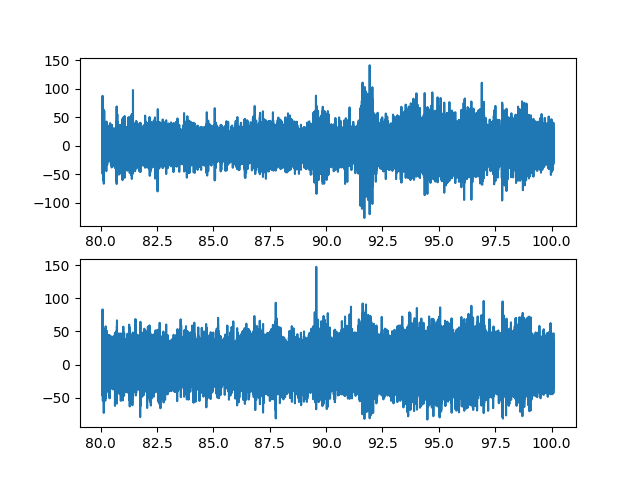

In [32]:
np.std(neural_agg)

0.7402678036578305

In [23]:
output, upwards = threshold_crossings(neural, -50)

In [10]:
output.shape

(32, 488282)